# Introduction to Machine Learning: Dummy Task

__Author__: Jannick Sicher

### Initial Configurations

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

### Train and Test Set

In [2]:
### Load train and test set
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
## Display train data
df_train.head()

,Id,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0,738.023171,1764.052346,400.157208,978.737984,2240.893199,1867.557990,-977.277880,950.088418,-151.357208,-103.218852,410.598502
1,1,400.646015,144.043571,1454.273507,761.037725,121.675016,443.863233,333.674327,1494.079073,-205.158264,313.067702,-854.095739
2,2,189.900156,-2552.989816,653.618595,864.436199,-742.165020,2269.754624,-1454.365675,45.758517,-187.183850,1532.779214,1469.358770
3,3,-78.399449,154.947426,378.162520,-887.785748,-1980.796468,-347.912149,156.348969,1230.290681,1202.379849,-387.326817,-302.302751
4,4,-547.373531,-1048.552965,-1420.017937,-1706.270191,1950.775395,-509.652182,-438.074302,-1252.795360,777.490356,-1613.897848,-212.740280


In [4]:
## Display test data
df_test.head()

,Id,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,10000,-483.797492,1288.057065,-129.878712,-198.078388,-334.487592,-391.443186,-612.406176,-676.523964,1327.229655,-448.695446
1,10001,-316.407305,30.830556,-313.356726,-173.259184,-327.368719,944.368248,1122.017380,112.338731,1372.340221,2062.561842
2,10002,-2448.558997,-561.988408,355.098820,634.378170,-392.450091,-813.156399,-232.873263,246.801210,-562.413197,-841.602015
3,10003,-942.120025,945.373015,140.910705,1753.565841,-347.223685,-1489.493408,-508.035412,1992.650031,555.461973,-1696.076948
4,10004,1752.366157,-597.550816,-466.491398,-1094.792276,-645.424882,-202.154830,205.073469,-270.385827,-310.299496,362.212675


In [5]:
## Train data: Predictors
df_train_X = df_train[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']]
df_train_X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1764.052346,400.157208,978.737984,2240.893199,1867.557990,-977.277880,950.088418,-151.357208,-103.218852,410.598502
1,144.043571,1454.273507,761.037725,121.675016,443.863233,333.674327,1494.079073,-205.158264,313.067702,-854.095739
2,-2552.989816,653.618595,864.436199,-742.165020,2269.754624,-1454.365675,45.758517,-187.183850,1532.779214,1469.358770
3,154.947426,378.162520,-887.785748,-1980.796468,-347.912149,156.348969,1230.290681,1202.379849,-387.326817,-302.302751
4,-1048.552965,-1420.017937,-1706.270191,1950.775395,-509.652182,-438.074302,-1252.795360,777.490356,-1613.897848,-212.740280


In [6]:
## Train data: Target
df_train_Y = df_train[['y']]
df_train_Y.head()

,y
0,738.023171
1,400.646015
2,189.900156
3,-78.399449
4,-547.373531


In [7]:
## Test data: Predictors
df_test_X = df_test[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']]
df_test_X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,-483.797492,1288.057065,-129.878712,-198.078388,-334.487592,-391.443186,-612.406176,-676.523964,1327.229655,-448.695446
1,-316.407305,30.830556,-313.356726,-173.259184,-327.368719,944.368248,1122.017380,112.338731,1372.340221,2062.561842
2,-2448.558997,-561.988408,355.098820,634.378170,-392.450091,-813.156399,-232.873263,246.801210,-562.413197,-841.602015
3,-942.120025,945.373015,140.910705,1753.565841,-347.223685,-1489.493408,-508.035412,1992.650031,555.461973,-1696.076948
4,1752.366157,-597.550816,-466.491398,-1094.792276,-645.424882,-202.154830,205.073469,-270.385827,-310.299496,362.212675


### Calculating Mean of Target Variable in Test Set

In [8]:
## Test data: Target Variable
df_test_Y1 = df_test[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']]
df_test_Y1['sum']= df_test_Y1.iloc[:,].sum(axis=1)
df_test_Y1['y'] = df_test_Y1["sum"]/10
df_test_Y1.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,sum,y
0,-483.797492,1288.057065,-129.878712,-198.078388,-334.487592,-391.443186,-612.406176,-676.523964,1327.229655,-448.695446,-660.024235,-66.002423
1,-316.407305,30.830556,-313.356726,-173.259184,-327.368719,944.368248,1122.017380,112.338731,1372.340221,2062.561842,4514.065044,451.406504
2,-2448.558997,-561.988408,355.098820,634.378170,-392.450091,-813.156399,-232.873263,246.801210,-562.413197,-841.602015,-4616.764171,-461.676417
3,-942.120025,945.373015,140.910705,1753.565841,-347.223685,-1489.493408,-508.035412,1992.650031,555.461973,-1696.076948,405.012088,40.501209
4,1752.366157,-597.550816,-466.491398,-1094.792276,-645.424882,-202.154830,205.073469,-270.385827,-310.299496,362.212675,-1267.447225,-126.744722


### Linear Regression

In [9]:
lm = LinearRegression()
lm.fit(df_train_X, df_train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
df_test['y'] = lm.predict(df_test_X)

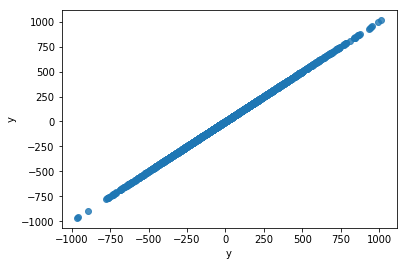

In [11]:
sns.regplot(df_test_Y1['y'],df_test['y'], fit_reg=False)

### Model Evaluation

In [12]:
# model evaluation
RMSE = mean_squared_error(df_test_Y1['y'], df_test['y'])**0.5
r2 = r2_score(df_test_Y1['y'], df_test['y'])

# printing values
print('Slope:' ,lm.coef_)
print('Intercept:', lm.intercept_)
print('Root mean squared error: ', RMSE)
print('R2 score: ', r2)

Slope: [[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
Intercept: [2.22044605e-15]
Root mean squared error:  1.0984270161209216e-12
R2 score:  1.0


### Submission File

In [13]:
submission = df_test[['Id', 'y']]
submission.head()

,Id,y
0,10000,-66.002423
1,10001,451.406504
2,10002,-461.676417
3,10003,40.501209
4,10004,-126.744722


In [14]:
submission.to_csv('submission.csv')    #to save the dataframe, df to submission.csv